###### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


###### Loading the necessary document

In [2]:
filename = r"C:\Users\HP\Downloads\individual+household+electric+power+consumption\household_power_consumption.txt"
df = pd.read_csv(filename, sep=";")

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.shape

(2075259, 9)

###### Data Cleaning

Checking for features with null values

In [5]:
# Checking the percentage of null_values in each features
null_values = {}
for i in df.columns:
    null_values[i] = (df[i].isna().sum() / len(df)) * 100

In [6]:
null_values

{'Date': 0.0,
 'Time': 0.0,
 'Global_active_power': 0.0,
 'Global_reactive_power': 0.0,
 'Voltage': 0.0,
 'Global_intensity': 0.0,
 'Sub_metering_1': 0.0,
 'Sub_metering_2': 0.0,
 'Sub_metering_3': 1.2518437457686005}

From the above exploration, Sub_metering_3 has 1.25% null values 

###### Filling up null values 

In [7]:
df["Sub_metering_3"].fillna(method="ffill", inplace=True)

Sub_metering_3 missing values have been filled up

###### Checking for duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicate values

###### Checking the data type of each feature

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [10]:
(df["Sub_metering_3"] == "?").sum()

0

###### Dropping every row with the ? symbol

In [11]:
index = df[df["Global_reactive_power"] == "?"].index
df.drop(index=index, inplace=True)

###### Converting them to the proper data type

In [12]:
cols = df.columns.to_list()[2:]
for i in cols:
    df[i] = df[i].astype(float)

###### Creating active_energy consumed every minute (in watt hour) feature

In [13]:
# df["active_energy"] =round(((df["Global_active_power"] * 1000)/60) - df["Sub_metering_1"] - df["Sub_metering_2"]- df["Sub_metering_3"], 2)

###### Merging Date and Time

In [14]:
df["Date_Time"] = df["Date"] + " " + df["Time"]

###### Coverting Date_Time to datetime format

In [15]:
df["Date_Time"] = pd.to_datetime(df["Date_Time"])

In [16]:
df.drop(columns=["Date", "Time"], inplace=True)

In [17]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


###### Making the Date column the index

In [18]:
df.set_index("Date_Time", inplace=True)

In [19]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


###### Hourly resampling

In [20]:
df_resample = df.resample("H").sum()

###### Question 11

<Axes: xlabel='Date_Time'>

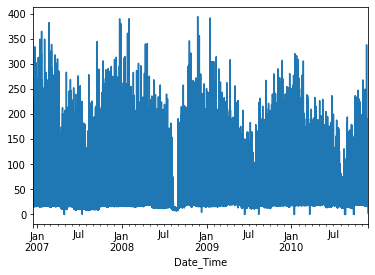

In [21]:
df_resample["Global_active_power"].plot()

###### Question 12

In [22]:
round(df["Global_active_power"].corr(df["Voltage"]), 4)

-0.3998

###### Question 13

In [23]:
round(df["Voltage"].corr(df["Global_intensity"]), 2)

-0.41

In [24]:
df_daily = df.resample("D").sum()

###### Dividing into test and training set

In [25]:
training_set = df_daily[:1142]

In [26]:
test_set = df_daily[1142:]

In [27]:
y_train = training_set["Global_active_power"]
y_test = test_set["Global_active_power"]

In [28]:
training_set = training_set.reset_index()
training_set.rename(columns={"Date_Time": "ds", "Global_active_power": "y"}, inplace=True)

In [29]:
test_set = test_set.reset_index()
test_set.rename(columns={"Date_Time": "ds", "Global_active_power": "y"}, inplace=True)

In [30]:
training_set.head()

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


###### Univariate Model

In [31]:
from prophet import Prophet
from prophet.diagnostics import performance_metrics

In [32]:
model = Prophet()

In [33]:
model.fit(training_set)

20:03:18 - cmdstanpy - INFO - Chain [1] start processing
20:03:18 - cmdstanpy - INFO - Chain [1] done processing


###### Predicting the next 300 days

In [34]:
future = model.make_future_dataframe(periods= 300)

In [35]:
forecast = model.predict(future)

In [36]:
test_forecast = forecast[["ds", "yhat"]].tail(300)

In [37]:
merged_df = pd.merge(test_forecast, test_set[["y", "ds"]], on="ds")

In [38]:
merged_df.head()

,ds,yhat,y
0,2010-01-31,2411.108994,1799.196
1,2010-02-01,2043.434796,1693.778
2,2010-02-02,2180.520593,2157.432
3,2010-02-03,2166.825471,2903.014
4,2010-02-04,1989.782936,2316.270


###### Question 14

In [39]:
merged_df['APE'] = np.abs((merged_df['y'] - merged_df['yhat']) / merged_df['y']) * 100
MAPE = merged_df['APE'].mean()
print(MAPE)

inf


###### Question 15

In [40]:
merged_df['residuals'] = merged_df['y'] - merged_df['yhat']

# Calculate MSE and RMSE
MSE = np.mean(merged_df['residuals']**2)
RMSE = np.sqrt(MSE)

print(f"RMSE: {RMSE:.2f}")

RMSE: 430.19


###### Question 16

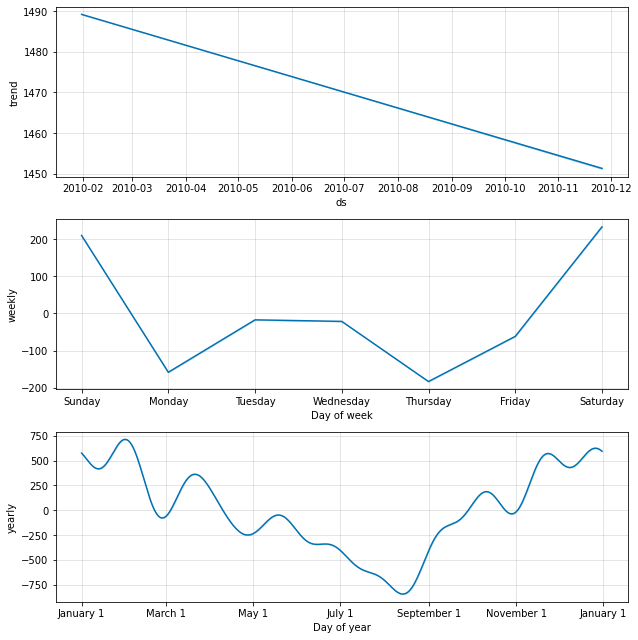

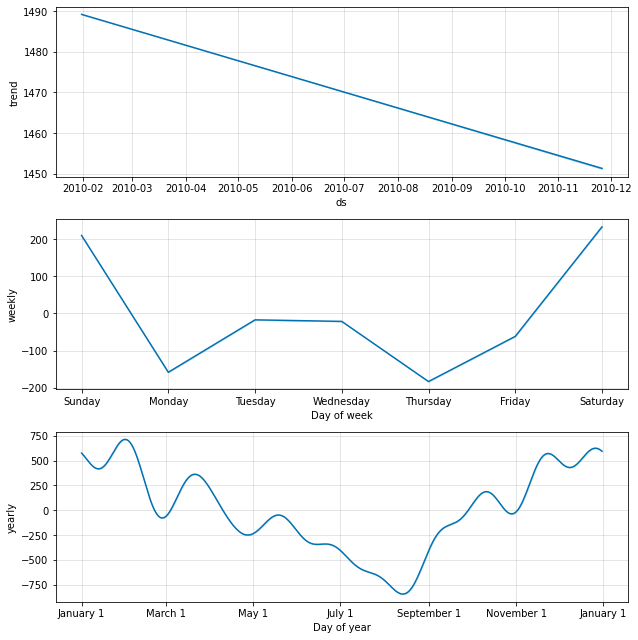

In [41]:
model.plot_components(forecast[1142:])

The answer to Question 16 is Thursday

###### Multivariate Model

In [42]:
multivariate_model = Prophet()

In [43]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [44]:
df_resample_multi = df_daily.copy()

In [45]:
df_resample_multi.rename(columns={"Global_reactive_power": "add1", "Voltage": "add2", "Global_intensity": "add3", "Sub_metering_1":
                             "add4", "Sub_metering_2": "add5", "Sub_metering_3": "add6", "Global_active_power": "y"},
                             inplace=True)

###### Dividing into train and test

In [46]:
train_days = len(df_resample_multi) - 300
multivariate_train = df_resample_multi[:train_days]
multivariate_test = df_resample_multi[train_days:]

In [47]:
multivariate_train = multivariate_train.reset_index()
multivariate_train.rename(columns={"Date_Time": "ds"}, inplace=True)

In [48]:
multivariate_test = multivariate_test.reset_index()
multivariate_test.rename(columns={"Date_Time": "ds"}, inplace=True)

In [49]:
multivariate_train.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [50]:
regressor = df_resample_multi.columns.to_list()[1:]
for reg in regressor:
    multivariate_model.add_regressor(reg)

In [51]:
multivariate_model.fit(multivariate_train)

20:03:20 - cmdstanpy - INFO - Chain [1] start processing
20:03:20 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
multivariate_future = model.make_future_dataframe(periods=300)

In [53]:
multivariate_future = df_resample_multi
multivariate_future = multivariate_future.reset_index()
multivariate_future = multivariate_future.rename(columns={"Date_Time": "ds"})

In [54]:
multivariate_forecast = multivariate_model.predict(multivariate_future)

In [55]:
multivariate_forcast_df = multivariate_forecast[["ds", "yhat"]].tail(300)

In [56]:
multivariate_forcast_df.head()

,ds,yhat
1142,2010-01-31,1802.654903
1143,2010-02-01,1697.653494
1144,2010-02-02,2149.938807
1145,2010-02-03,2897.562271
1146,2010-02-04,2321.762496


In [57]:
multivariate_merged = pd.merge(multivariate_test[["ds", "y"]], multivariate_forcast_df, on="ds")

###### Question 17

In [58]:
multivariate_merged['APE'] = np.abs((multivariate_merged['y'] - multivariate_merged['yhat']) / multivariate_merged['y']) * 100
MAPE = multivariate_merged['APE'].mean()

print(MAPE)

inf


###### Question 18

In [59]:
multivariate_merged['residuals'] = multivariate_merged['y'] - multivariate_merged['yhat']

# Calculate MSE and RMSE
MSE = np.mean(multivariate_merged['residuals']**2)
RMSE = np.sqrt(MSE)

print(f"RMSE: {RMSE:.2f}")

RMSE: 19.18


###### Question 19

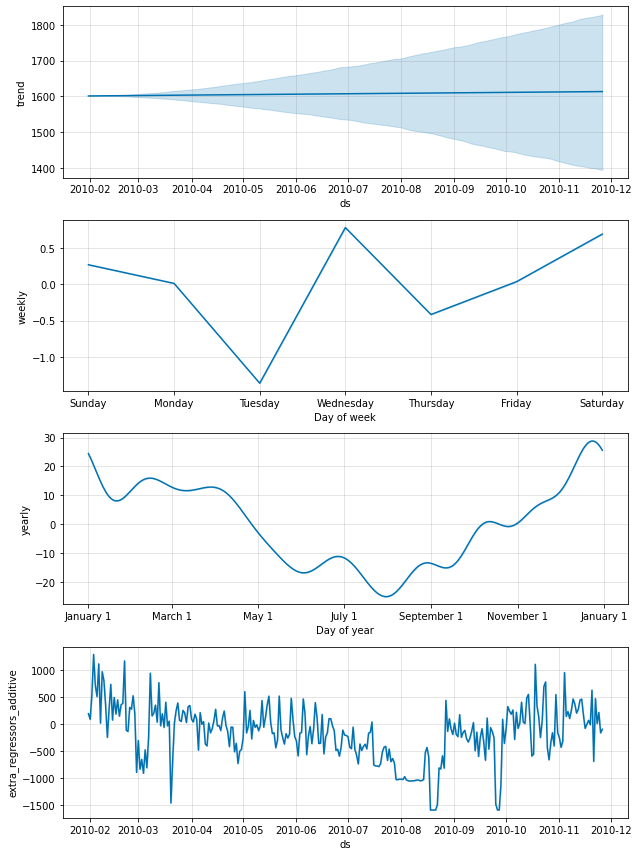

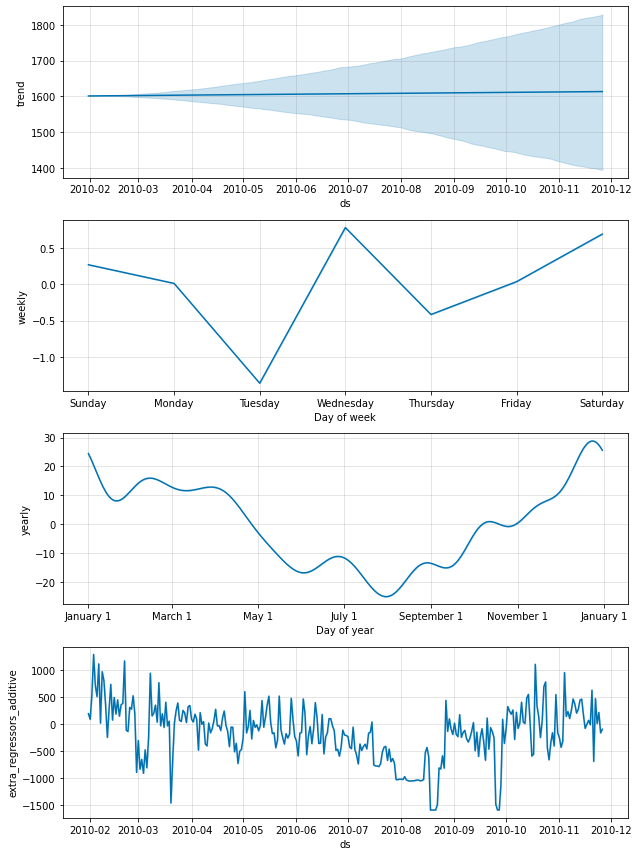

In [60]:
multivariate_model.plot_components(multivariate_forecast[1142:])

Answer to Question 19 is Tuesday

###### Question 20

Answer to Question 20 is September